In [83]:
#step1
import math

def euclideanDistance(a, b):
    distance = 0.0
    for i in range(len(a)):
        distance += (math.pow((a[i]-b[i]), 2))
    return math.sqrt(distance)

In [84]:
#step2
import math

def manhattanDistance(a, b):
    manDis = 0.0
    for i in range(len(a)):
        manDis += (abs(a[i]-b[i]))
    return manDis

In [88]:
#step3
import numpy as np

def accuraryGeneralization(predicted, actual):
    accuracy = sum(np.array(predicted) == np.array(actual)) / float(len(actual))
    generalization = 1 - accuracy
    return accuracy, generalization


In [87]:
#step4

def precisionScore(y_train, y_train_pred):
    tp = sum((np.array(y_train) == 1) & (np.array(y_train_pred) == 1))
    fp = sum((np.array(y_train) == 0) & (np.array(y_train_pred) == 1))
    score = tp/(tp+fp)
    return score

def recallScore(y_train, y_train_pred):
    tp = sum((np.array(y_train) == 1) & (np.array(y_train_pred) == 1))
    fn = sum((np.array(y_train) == 1) & (np.array(y_train_pred) == 0))
    score = tp/(tp+fn)
    return score

def f1_score(y_train, y_train_pred):
    tp = sum((np.array(y_train) == 1) & (np.array(y_train_pred) == 1))
    fn = sum((np.array(y_train) == 1) & (np.array(y_train_pred) == 0))
    fp = sum((np.array(y_train) == 0) & (np.array(y_train_pred) == 1))
    score = tp/(tp+((fn+fp)/2))
    return score


In [89]:
#step5

def confusionMatrix(actual, prediction):
    confusionLists = np.unique(actual)
    matrixSize = len(confusionLists)
    matrix = np.zeros((matrixSize, matrixSize))
    for i in range (matrixSize):
        for j in range (matrixSize):
            matrix[i, j] = np.sum((actual == confusionLists[i]) & (predicted == confusionLists[j]))
    return matrix


In [90]:
#step6

import matplotlib.pyplot as plt
%matplotlib inline

def roc_curve(y_train, y_train_pred):
    fprList = []
    tprList = []
    for i in range(len(y_train)):
        tp = sum((np.array(y_train[i]) == 1) & (np.array(y_train_pred[i]) == 1))
        fn = sum((np.array(y_train[i]) == 1) & (np.array(y_train_pred[i]) == 0))
        fp = sum((np.array(y_train[i]) == 0) & (np.array(y_train_pred[i]) == 1))
        tn = sum((np.array(y_train[i]) == 0) & (np.array(y_train_pred[i]) == 0))
        fpr = fp/(fp+tn)
        tpr = tp/(tp+fn)
        fprList.append(fpr)
        tprList.append(tpr)
        
    plt.plot(fprList, tprList)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    return

In [91]:
#step7

import matplotlib.pyplot as plt

def AUC(y_train, y_train_pred):
    fprList = []
    tprList = []
    for i in range(len(y_train)):
        tp = sum((np.array(y_train[i]) == 1) & (np.array(y_train_pred[i]) == 1))
        fn = sum((np.array(y_train[i]) == 1) & (np.array(y_train_pred[i]) == 0))
        fp = sum((np.array(y_train[i]) == 0) & (np.array(y_train_pred[i]) == 1))
        tn = sum((np.array(y_train[i]) == 0) & (np.array(y_train_pred[i]) == 0))
        fpr = fp/(fp+tn)
        tpr = tp/(tp+fn)
        fprList.append(fpr)
        tprList.append(tpr)
            
    plt.plot(fprList, tprList)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    
    auc = np.trapz(fprList, tprList)
    print('AUC: %.2f' %auc)
    return


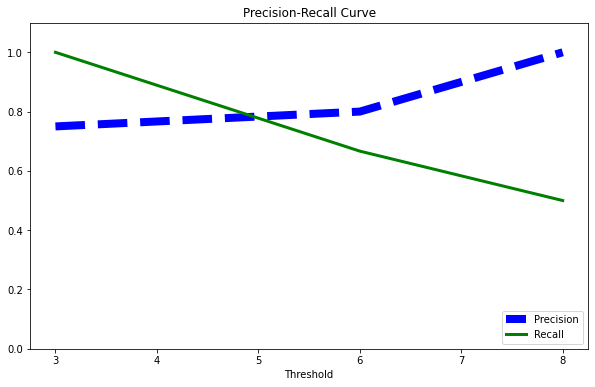

In [92]:
#step8
import matplotlib.pyplot as plt
%matplotlib inline

# testing, out of 10 data points
tps = [6,4,3]
fps = [2,1,0]
fns = [0,2,3]
thresholds = [3,6,8]

def precisions(tp, fp):
    precision_array = []
    for i in range(len(tp)):
        precision = tp[i] / (tp[i] + fp[i])
        i += 1
        precision_array.append(precision)
    return precision_array


def recalls(tp, fn):
    recall_array = []
    for i in range(len(tp)):
        recall = tp[i] / (tp[i] + fn[i])
        i += 1
        recall_array.append(recall)
    return recall_array


precisions = precisions(tps, fps)
recalls = recalls(tps, fns)

fig = plt.figure(figsize=(10, 6))


def precision_recall_curve(precision, recall, threshold):
    plt.plot(threshold, precision, "b--", linewidth=8, label="Precision")
    plt.plot(threshold, recall, "g-", linewidth=3, label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="lower right")
    plt.title('Precision-Recall Curve')
    # plt.xlim([0, 1])
    plt.ylim([0, 1.1])


precision_recall_curve(precisions, recalls, thresholds)
plt.show()

In [93]:
#step9

def fit(self, X, Y, n_neighbors, weights, kwargs):
    self.X = X
    self.Y = Y
    self.n_neighbors = n_neighbors
    self.weights = weights
    self.kwargs = kwargs
    
    neighborDistanceRow = []
    
    for row, column in enumerate(X):
        distance = weights(column[:-1], Y)
        neighborDistanceRow.append(distance, row)
    
    sortedNeighborDistanceRow = sorted(neighborDistanceRow)
    
    kDistanceRow =  sortedNeighborDistanceRow[:n_neighbors]
    
    kLabel = [X[i][1] for distance, i in kDistanceRow]
    
    return 

def predict(self, X):
    return 
    
def __init__(self):
    return self
    

In [98]:
#step10
import pandas as pd

df = pd.read_csv('winequality-white.csv')
df = pd.read_csv('winequality-white.csv', sep = ';', skipinitialspace=True)

In [99]:
#step11

df.rename(columns={'quality':'target'}, inplace=True)

In [100]:
#step11

def categorizeQualityData(dataFrame, columnName):
    for i in range(dataFrame.shape[0]):
        if dataFrame[columnName][i] > 5:
            dataFrame[columnName][i] = 0
        else:
            dataFrame[columnName][i] = 1  
    return 

categorizeQualityData(df, 'target')
df.head()


<ipython-input-100-96faba94be20>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame[columnName][i] = 0
<ipython-input-100-96faba94be20>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame[columnName][i] = 1


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0


In [101]:
#step12
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,0.334831
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.471979
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,0.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,0.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,1.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,1.000000


In [102]:
#step13
df = df.sample(frac=1) 

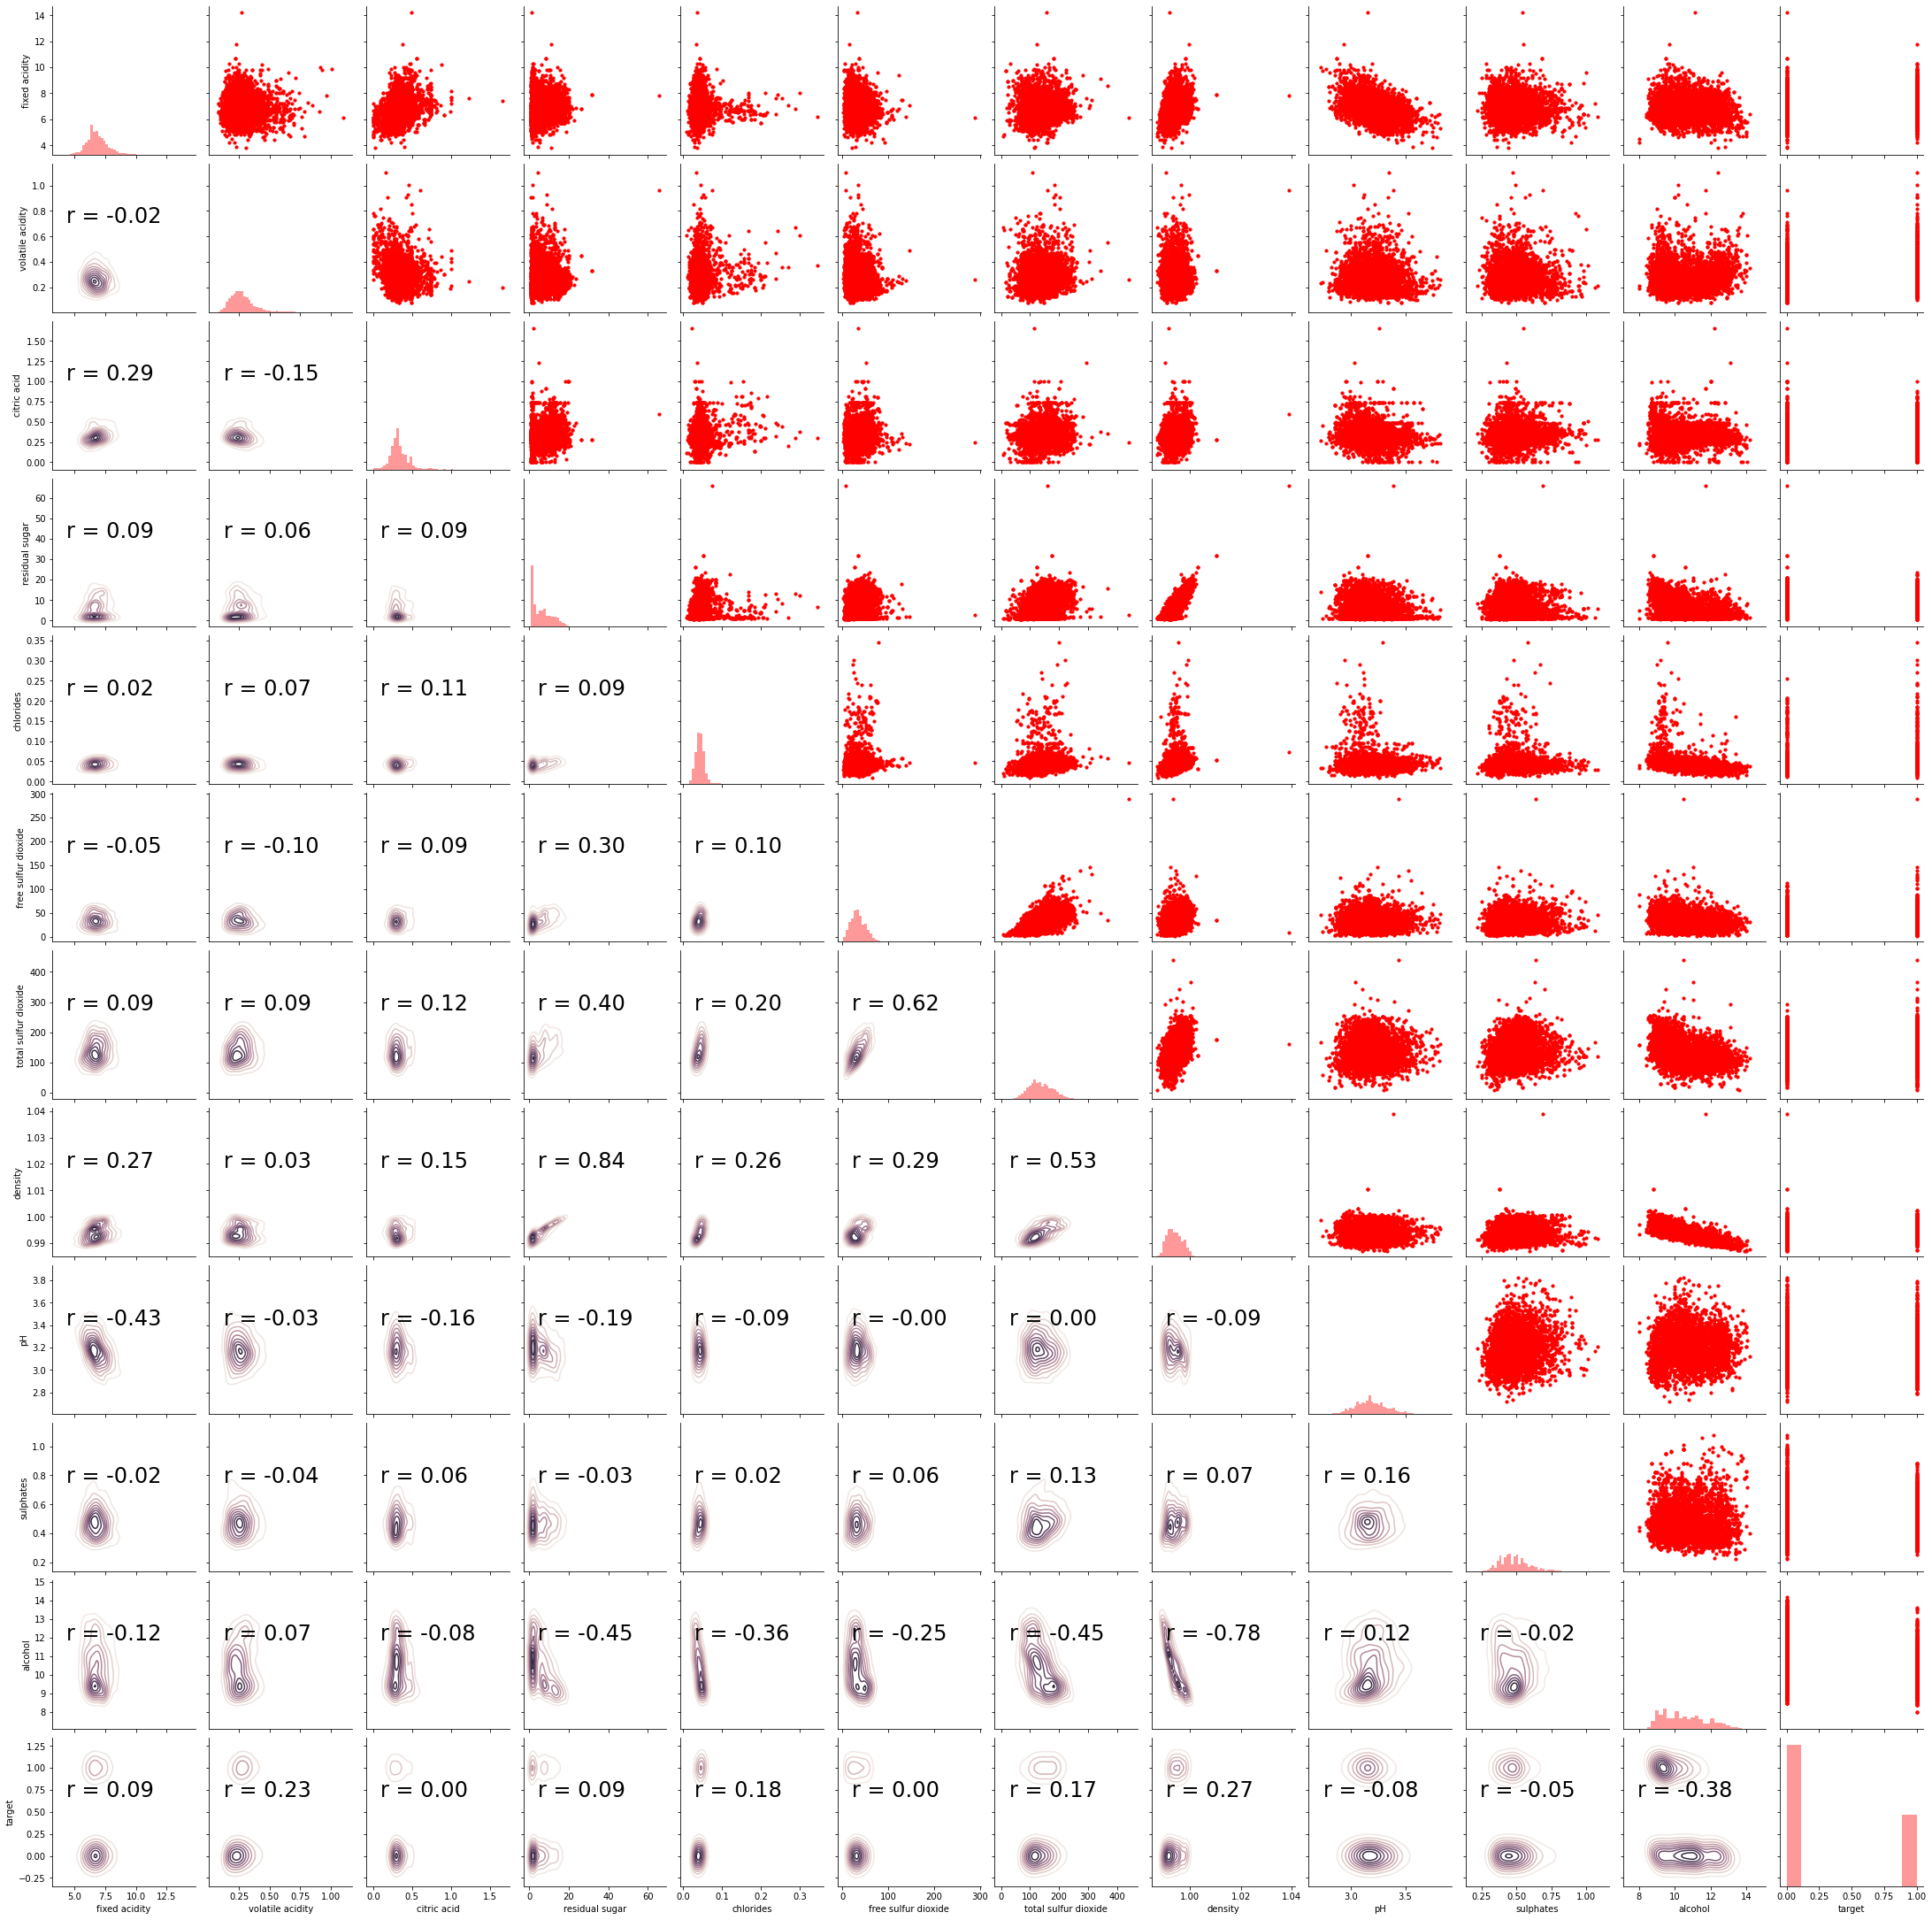

In [103]:
#step14
import warnings
warnings.filterwarnings('ignore')


# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from scipy import stats

# Calculate correlation coefficient
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .6), xycoords=ax.transAxes,
               size = 24)
    
cmap = sns.cubehelix_palette(light=1, dark = 0.1,
                             hue = 0.5, as_cmap=True)

sns.set_context(font_scale=2)

# Pair grid set up
g = sns.PairGrid(df)

# Scatter plot on the upper triangle
g.map_upper(plt.scatter, s=10, color = 'red')

# Distribution on the diagonal
g.map_diag(sns.distplot, kde=False, color = 'red')

# Density Plot and Correlation coefficients on the lower triangle
g.map_lower(sns.kdeplot, cmap = cmap)
g.map_lower(corrfunc);

In [63]:
#step15
df = pd.get_dummies(df)


Most Correlated Features:

target                  1.000000
alcohol                 0.383280
density                 0.268696
volatile acidity        0.225440
chlorides               0.183939
total sulfur dioxide    0.170924
residual sugar          0.092756
fixed acidity           0.089749
pH                      0.083687
sulphates               0.051858
free sulfur dioxide     0.001278
citric acid             0.000700
Name: target, dtype: float64


In [104]:
#step16

def partition(X,y,t):
    x_train = np.array(X[int((len(X)+1)*t):])
    x_test = np.array(X[:int((len(X)+1)*t)])
    y_train = np.array(y[int((len(y)+1)*t):])
    y_test = np.array(y[:int((len(y)+1)*t)]) 
    return x_train, x_test, y_train, y_test

y = df['target'] #target vector
X = df.drop(columns='target') #features matrix
t = 0.2

x_train,x_test,y_train,y_test=partition(X,y,t)


In [ ]:
#step18

def partitionSplit(df, folds):
    s_partition = []
    dfCopy = df
    eachPartition = int(df.shape[0] / folds)
    for i in range(folds):
        partition = []
        for j in range(eachPartition):
            if(len(partition) < eachPartition):
                value = dfCopy.index[0]
                partition.append(dfCopy.loc[value].values.tolist())
                dfCopy = dfCopy.drop(value)
        s_partition.append(np.asarray(partition))
        
    return s_partition

print(partitionSplit(df, 10))

def averageError(predicted, actual):
    return (sum(np.array(predicted) == np.array(actual)) / float(len(actual))) * 100.0

def sFold(folds, data, labels, model, **model_args, error_fuction):
    split = partitionSplit(data, folds)
    if model == "knn":
        for i in split:
            trainSet = list(split)
            trainSet.remove(i)
            trainSet = sum(trainSet, [])
            trainSet = list()
            
        predictedLabel
        expectedLabel = []
        mse = (np.square(expectedLabel - predictedLabel)).mean(axis=ax)

        

In [165]:
#step 9

import numpy as np
from math import * 
from collections import defaultdict

def euclideanDistance(a, b):
    distance = 0.0
    for i in range(len(a)):
        distance += (math.pow((a[i]-b[i]), 2))
    return math.sqrt(distance)

def inverseWeights(distance):
    if distance == 0:
        return 1
    else:
        return (1/distance)
    
#     for distance, i in distances:
#         if distance == 0:
#             inverse = [(1,i) for distance, i in distances]
#             return inverse
#         else:
#             inverse = [(1/distance,i) for distance, i in distances]  
#             return inverse
    
class KNN:    
    def fit(self, X, y, n_neighbour = 5, weights = 'distance'):
        self.X = X
        self.y = y
        self.n_neighbour = n_neighbour
        self.weights = weights
        
    def _init_(self, n_neighbour=5, weights='uniform'):
        self.n_neighbour = n_neighbour
        self.weights = weights
        
    def predict(self, X, y):  # test = x_test
        labels = []
        for x in X:
            distanceNeighbours = []
            KNearestNeighbours = []
            KNN = []
            labelValues = []
            weightsCalculated = []
            labelWeight = defaultdict(list)
            zeroCount = 0
            oneCount = 0
            totalWeightZero = 0
            totalWeightOne = 0

            if self.weights is None: #self.weights.equal('uniform'): 
                for i in self.X:
                    distance = euclideanDistance(x, i)
                    distanceNeighbours.append([distance, i])
                    
                KNN = sorted(distanceNeighbours)                    
                KNearestNeighbours = KNN[:self.n_neighbors]
                
                for distance, i in KNearestNeighbours:
                    labelvalues.append(self.y[i])
                    
                for i in range(len(labelvalues)):
                    if labelvalues[i] == 0:
                        zeroCount += 1
                    elif labelvalues[i] == 1:
                        oneCount +=1
                        
                if zeroCount > oneCount:
                    labelPredicted = 0
                elif zeroCount < oneCount:
                    labelPredicted = 1
                    
                labels.append(labelPredicted)

            else: #self.weights.equal('distance'):
                for i in self.X:
                    distance = euclideanDistance(x, i)
                    distanceNeighbours.append([distance, i])
                    
                KNN = sorted(distanceNeighbours) 
                KNearestNeighbours = KNN[:self.n_neighbors]

                for distance, i in KNearestNeighbours:
                    weightsCalculated = inverseWeights(distance)
                    labelvalues.append([weightsCalculated[0], self.y[i]])
                    if labelvalues[1] == 0:
                        totalWeightZero +=  labelvalues[0]
                    if labelvalues[1] == 1:
                        totalWeightOne +=  labelvalues[0]
                        
                if totalWeightZero > totalWeightOne:
                    labelPredicted = 0
                elif totalWeightZero < totalWeightOne:
                    labelPredicted = 1
                    
                labels.append(labelPredicted)
                
        return labels

model = KNN()
model.fit(x_train, y_train)
model.predict(x_test, y_test)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
#Step 19

In [ ]:
#Step 20

knn.fit(xTrain, yTrain, 11, 'euclidean')
predict = knn.predict(xTest, 'distance')
print('Precision:', precisionScore(yTrain, predict))
print('Recall:', recallScore(yTrain, predict))
print('F1 score:', f1_score(yTrain, predict))
print('Confusion Matrix:', confusionMatrix(yTrain, predict))
print('Accuracy and Generalization Error:', accuraryGeneralization(yTrain, predict))

In [ ]:
#Step 21
roc_curve(yTest, score[:,0])

In [ ]:
#Step 22
AUC(yTest, score[:,1])

In [105]:
#Step 24
from math import sqrt

def confidenceInterval(z, accuracy, n):
    result = 1.96 * sqrt((accuracy * (1 - accuracy)) / n)
    print('%.3f' % result)
    
confidenceInterval(1.96, 0.2, 10)

0.248
